# Avacado Project

## Content 

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

# Attribute Information

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold

## Task:

Our task is to make a model that can consider the data provided and predict the Average Price.

# Importing requried Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
## Loading the dataset
df=pd.read_csv('avocado.csv',parse_dates=['Date'])
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [3]:
df.shape

(16468, 14)

We have 16468 rows and 14 columns including Target column.

Average Price is our target atrribute.

In Problem Statement, we have to predict Average Price which is our target, so this is a Regression Problem Statement.

In [4]:
df.dtypes

Unnamed: 0             float64
Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                   float64
region                  object
dtype: object

We have one attribute of data time datatype.

All features have float datatype except region and type which are object data type.

year has a float data type we can convert it into string and encode it for model building.

All datatypes are ok.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    1517 non-null   float64       
 1   Date          1517 non-null   datetime64[ns]
 2   AveragePrice  1517 non-null   float64       
 3   Total Volume  1517 non-null   float64       
 4   4046          1517 non-null   float64       
 5   4225          1517 non-null   float64       
 6   4770          1517 non-null   float64       
 7   Total Bags    1517 non-null   float64       
 8   Small Bags    1517 non-null   float64       
 9   Large Bags    1517 non-null   float64       
 10  XLarge Bags   1517 non-null   float64       
 11  type          1517 non-null   object        
 12  year          1517 non-null   float64       
 13  region        1517 non-null   object        
dtypes: datetime64[ns](1), float64(11), object(2)
memory usage: 1.8+ MB


We can see that we have 16468 rows present in our dataset but only 1517 columns contain the values. We also ckecked in Excel and raw csv file and found that there are so many empty rows with no values. We can consider them as null values.

In [6]:
## checking Null values
df.isnull().sum()

Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

In [7]:
## Dropping all null values 
df_1=df.dropna()

In [8]:
df_1.shape

(1517, 14)

In [9]:
df_1.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<AxesSubplot:title={'center':'NUll values Heatmap'}>

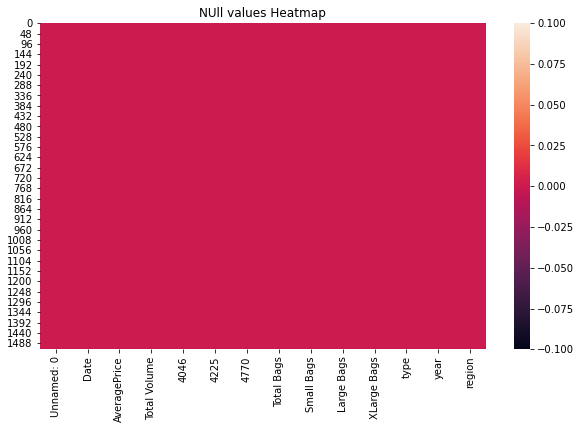

In [10]:
plt.figure(figsize=(10,6))
plt.title('NUll values Heatmap')
sns.heatmap(df_1.isnull())

Now there is no null values present in our dataset.

In [11]:
## Statistical Summary
df_1.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,26.995386,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,14.848287,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.000000,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,14.000000,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,29.000000,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,39.000000,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,51.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


#### Observation:-
1- We can see in Large Bags,XLarge Bags and 4770 Hass Avacado the Minimun values is Zero.

2-Our target Attribute AveragePrice is Normally Distributed.

3- Some Features are highly Right skewed like 4046,4225,4770,Total bags etc.

4-The gap between 3rd quantile and Max values is very high in 4046,4225,Total bags and other skewed columns so it clearly indicates that outliers are present in our data.

In [12]:
df_1['Year'] = pd.DatetimeIndex(df_1['Date']).year
df_1['Month']=pd.DatetimeIndex(df_1['Date']).month
df_1['day']=pd.DatetimeIndex(df_1['Date']).day
df_1['Year'] = df_1['Year'].astype(str)

In [13]:
## Dropping the Unnecessary COlumns
df_2=df_1.drop(['Unnamed: 0','Date','year'],axis=1)

## I have dropped the columns Unnamed: 0 because it is just a counting number which has no significance in prediction

## I have droppend date column because we have extracted the Day, Month, Year seperatly from Date column.

## I have dropped year column because we get same columns Year y feature Extraction from our Date Column.

<AxesSubplot:>

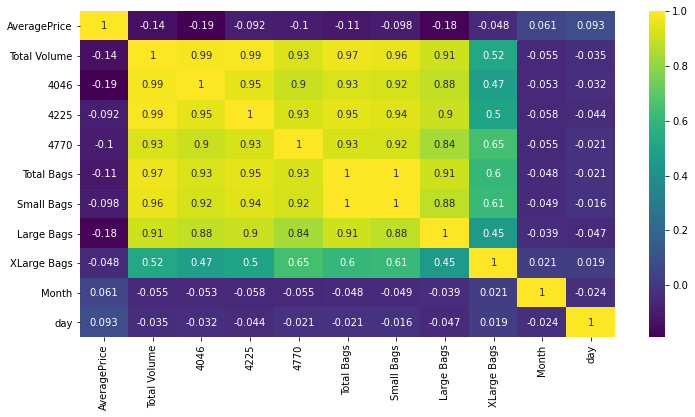

In [14]:
plt.figure(figsize = (12, 6))
sns.heatmap(df_2.corr(), annot = True, cmap = 'viridis')

#### Observation:-
1- As we can see there is very less correlation between the target variable and other features.

2- Here we can see that there is very high correlation among the features Total Volume, 4046, 4225, 4770, Total Bags, small bags, Large Bags etc. Hence Multicollinearity exists.

<AxesSubplot:title={'center':'Coreelation with Target'}>

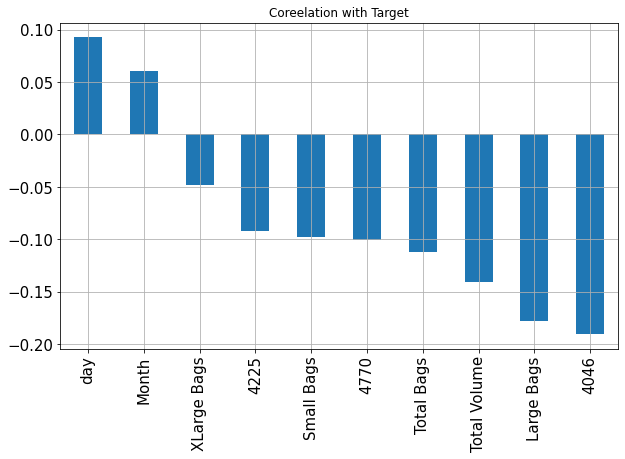

In [15]:
df_2.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot.bar(figsize=(10,6),grid=True,title='Coreelation with Target',fontsize=15)

We can see that only few features Feature positivly correlated with our Target Attribute AveragePrice.

But the correlation is not very strong enough.

Mostly features are negativly correlated with our Target attribute.

# Data Visualization

<AxesSubplot:title={'center':'Price tread over the Year'}, xlabel='Year', ylabel='AveragePrice'>

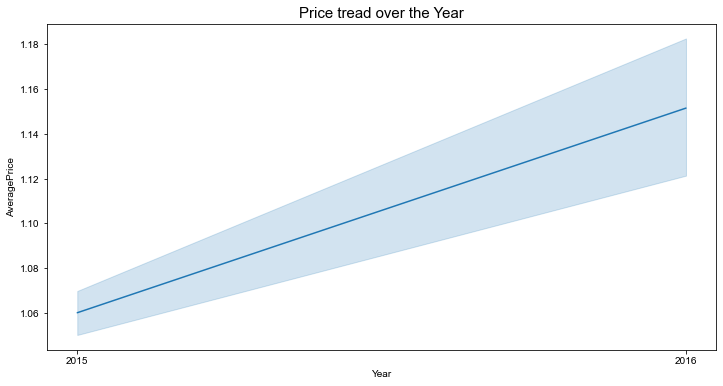

In [16]:
plt.figure(figsize=(12,6))
plt.title('Price tread over the Year',fontsize=15)
sns.set_style('whitegrid')
sns.lineplot(df_2['Year'],df_2['AveragePrice'],data=df_2)

There is a clear sign that prices of Avacado rises linearly from 2015 to 2016.

<AxesSubplot:title={'center':'Price tread Monthly'}, xlabel='Month', ylabel='AveragePrice'>

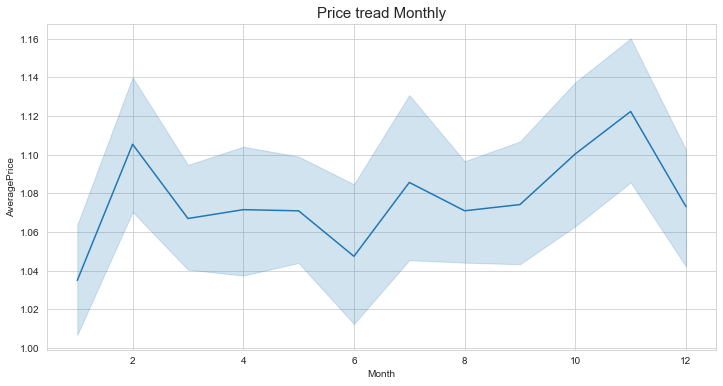

In [17]:
plt.figure(figsize=(12,6))
plt.title('Price tread Monthly',fontsize=15)
sns.set_style('whitegrid')
sns.lineplot(df_2['Month'],df_2['AveragePrice'],data=df_2)

From above trend we can see that the average price of Avacado rises in Feb and Nov Months of the year.

<AxesSubplot:title={'center':'Areawise Sales of Avacado in US'}, xlabel='region'>

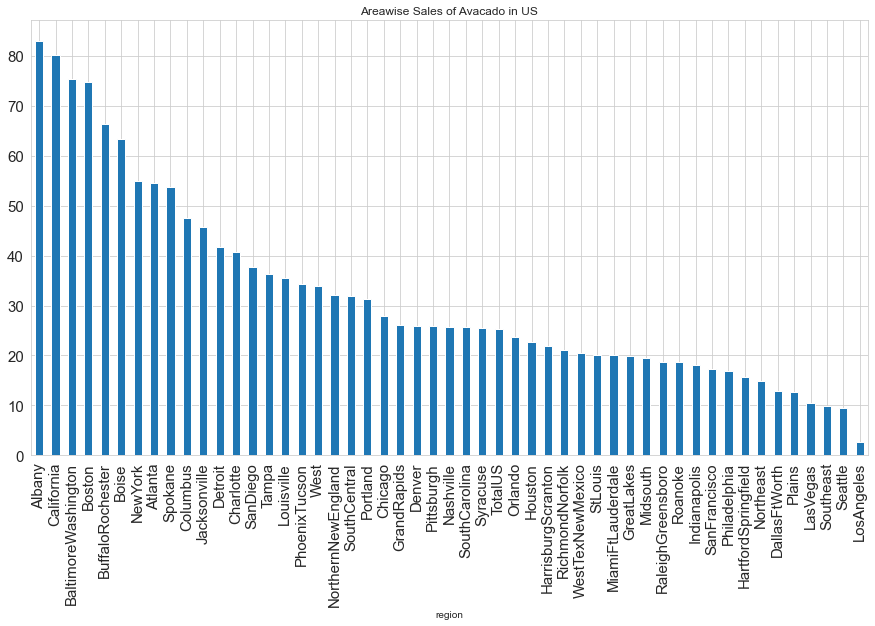

In [18]:
df_2.groupby('region')['AveragePrice'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(15,8),title='Areawise Sales of Avacado in US',fontsize=15)

Here we can see the trend of sales of Avacado in different cities of US.

LogAngeles has least consumption/demand for Avacado and Albany has highest.

<AxesSubplot:title={'center':' Price of Avacado in US'}, xlabel='region'>

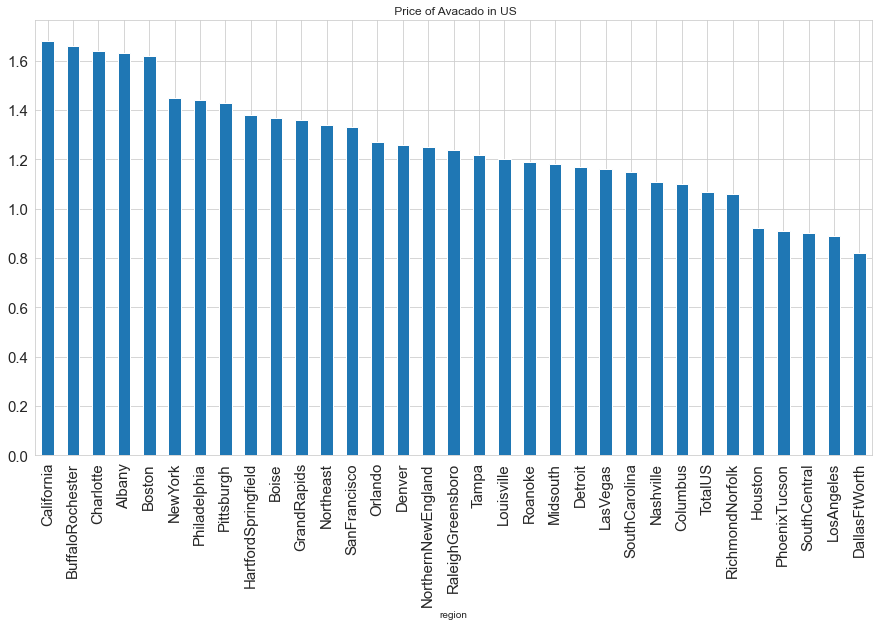

In [19]:
df_2.groupby('region')['AveragePrice'].max().sort_values(ascending=False).drop_duplicates().plot(kind='bar',figsize=(15,8),title=' Price of Avacado in US',fontsize=15)

#### Observation:-

1- We can see that California has highest price of Avocado and DallasFtWorth has the lowest price of Avocado in US.


<AxesSubplot:title={'center':'Volumne VS Average Price'}, xlabel='AveragePrice', ylabel='Total Volume'>

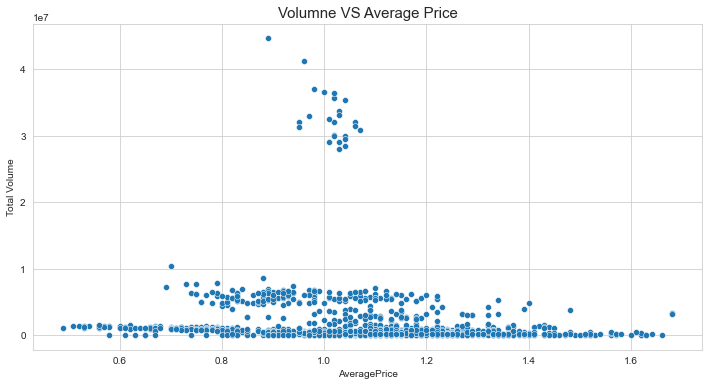

In [20]:
plt.figure(figsize=(12,6))
plt.title('Volumne VS Average Price',fontsize=15)
sns.scatterplot(df_2['AveragePrice'],df_2['Total Volume'],data=df_2)

We can observe that there is a constant line between Total Volumne and Average Price.

Some outliers we can detect in Total Volumne

There is no linear relation exists between Average price and Total Volume.

<AxesSubplot:title={'center':'Avacado 4046 VS Average Price'}, xlabel='AveragePrice', ylabel='4046'>

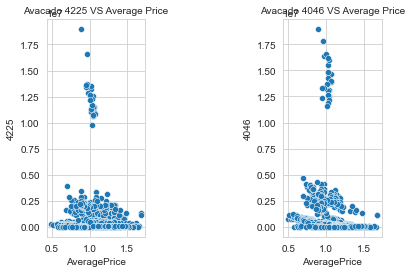

In [21]:
plt.subplot(1,3,1)
plt.title('Avacado 4225 VS Average Price',fontsize=10)
sns.scatterplot(df_2['AveragePrice'],df_2['4225'],data=df_2)

plt.subplot(1,3,3)
plt.title('Avacado 4046 VS Average Price',fontsize=10)
sns.scatterplot(df_2['AveragePrice'],df_2['4046'],data=df_2)

Two Different Avacado with Different Hass Code shows almost similar Average price.

We can conclude that both Hass Avacado has similar Average price but they are tagged differently.

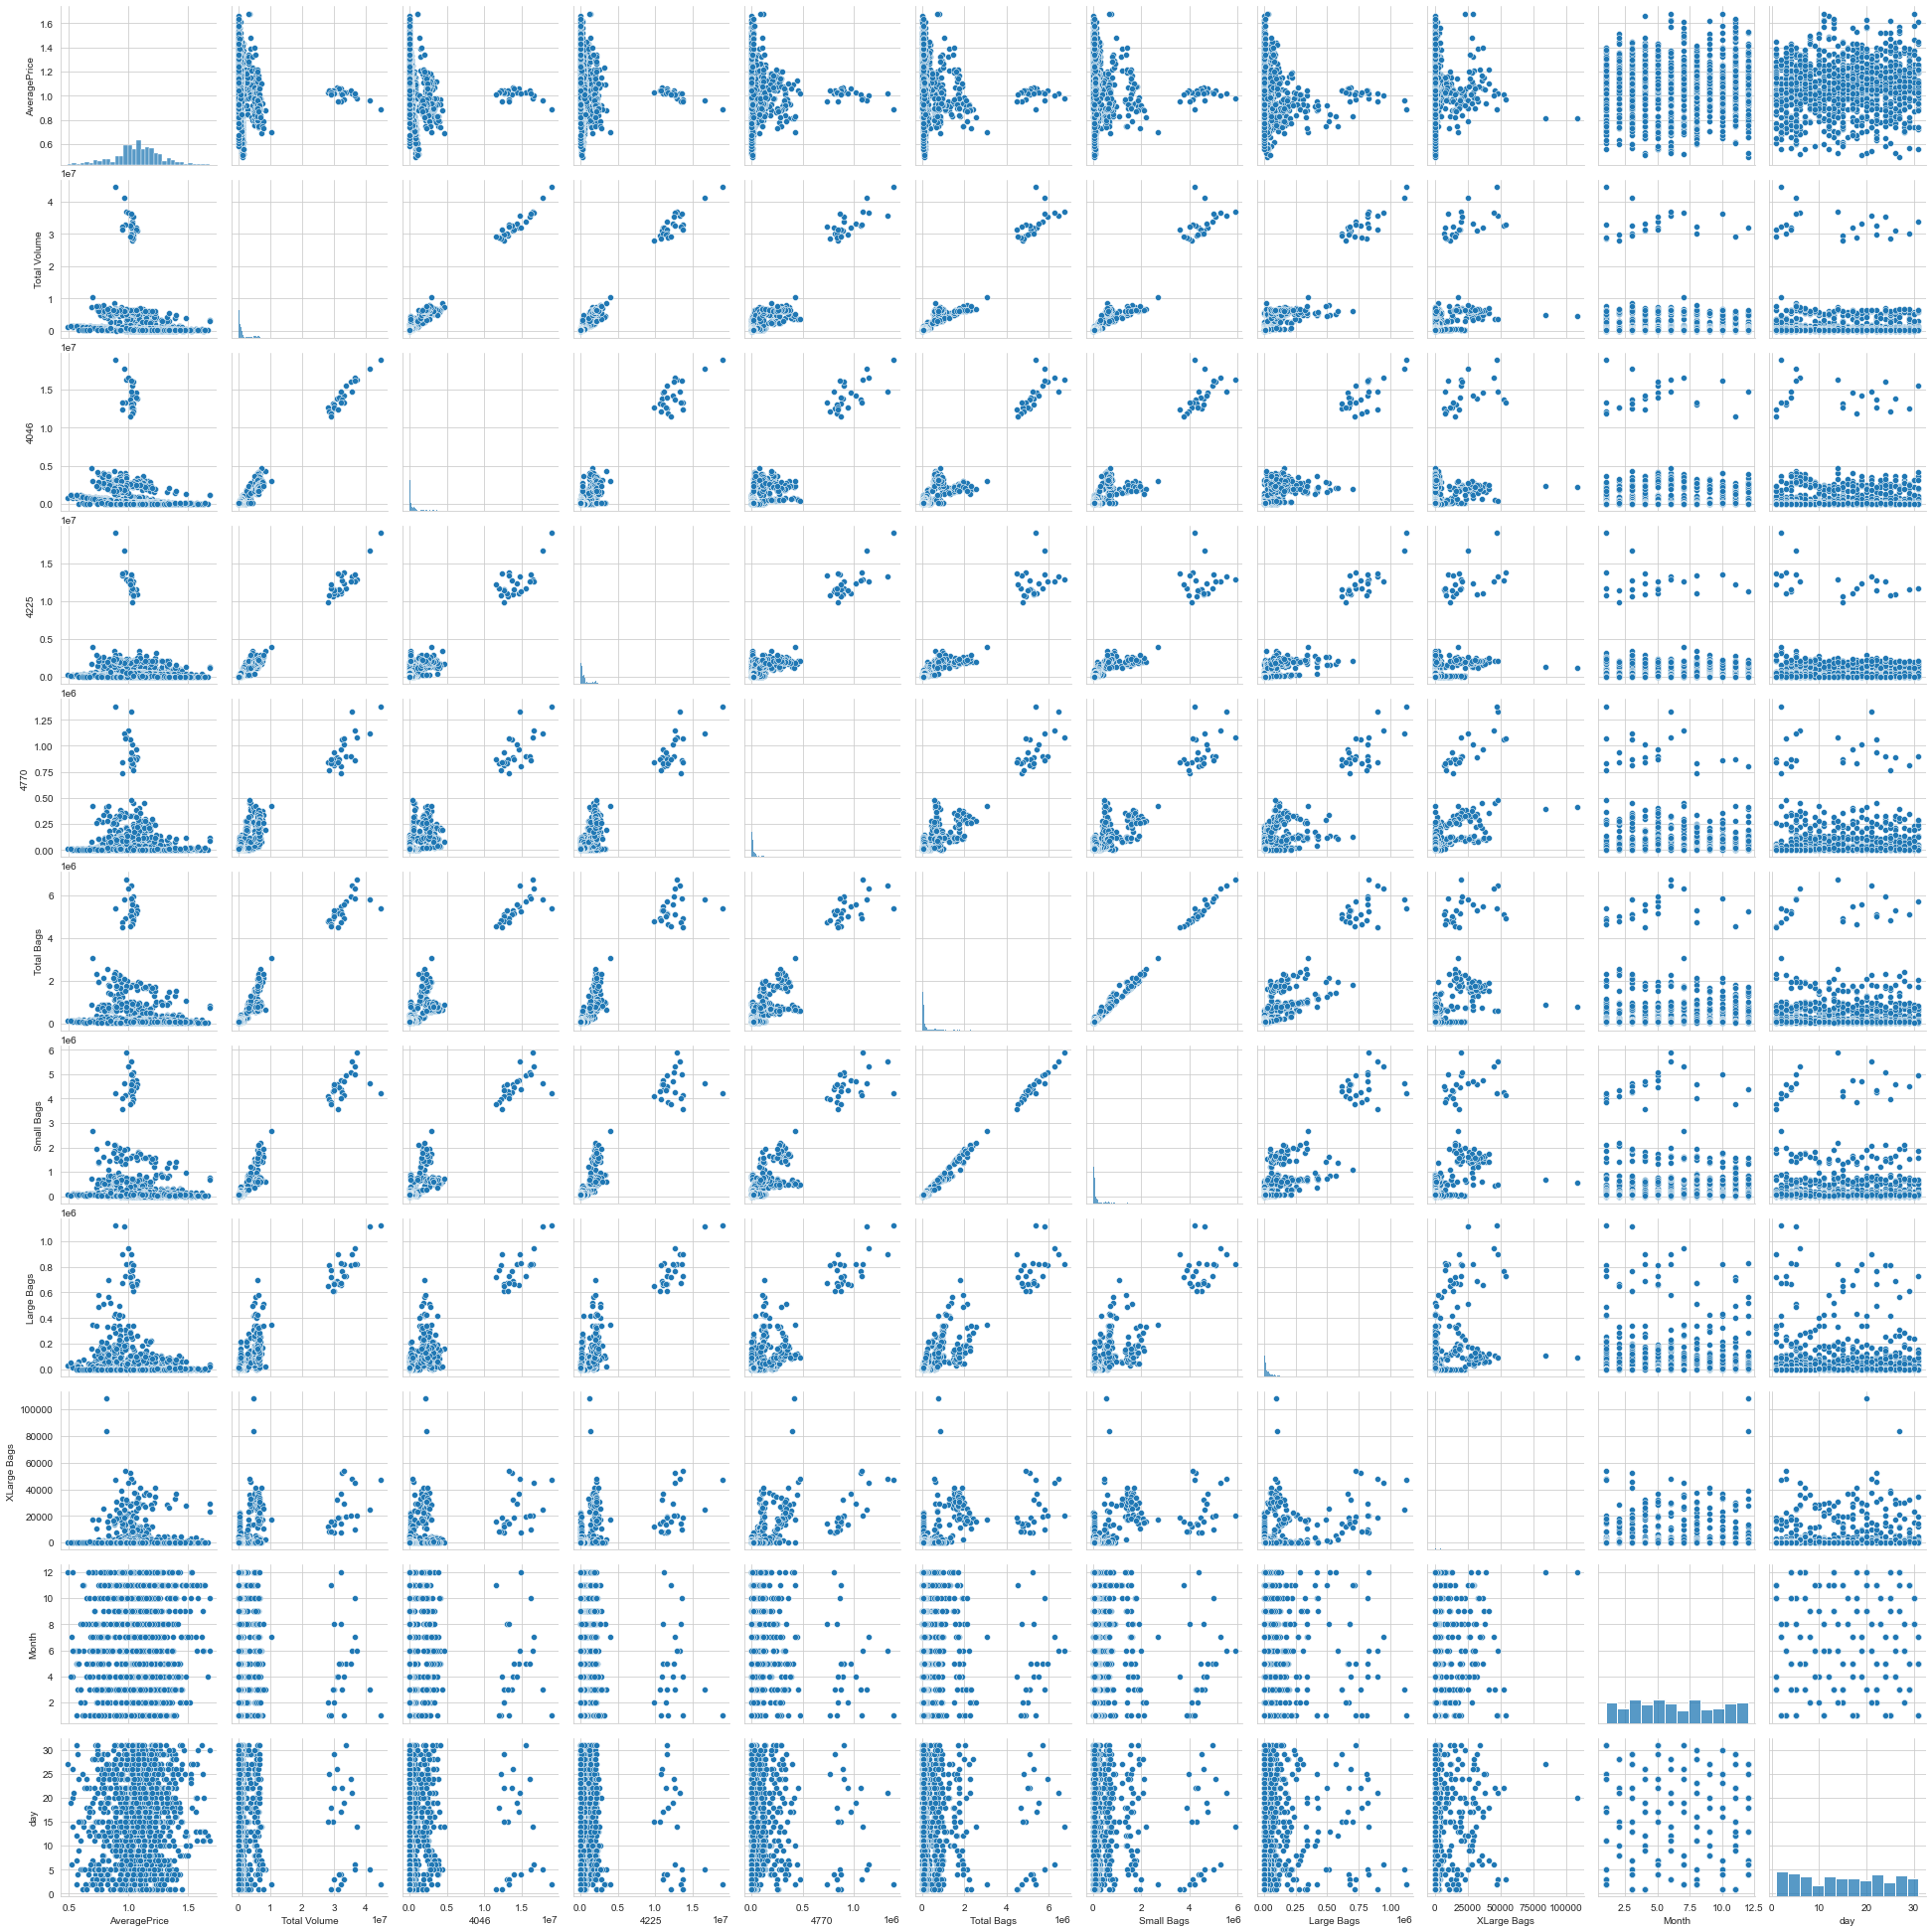

In [22]:
## Plotting all possible graphs by pairplot
sns.pairplot(df_2)

Pairplot has been constucted above to show or allow us the see both the distribution of each variables and also to show the relationship between each of the two variables, some show the positive corelation where as some show negative corelation for some there are holizontal lines which shows neutral relationship with each other.

Through the above and below graph we have come accros to the attributes or the fields which are positively corelated or neutral corelated to each other, Hence we would be taking them in to the consideration.

These fields are : 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year'.

These fields are some what showing positive or neutral correlation with each other.

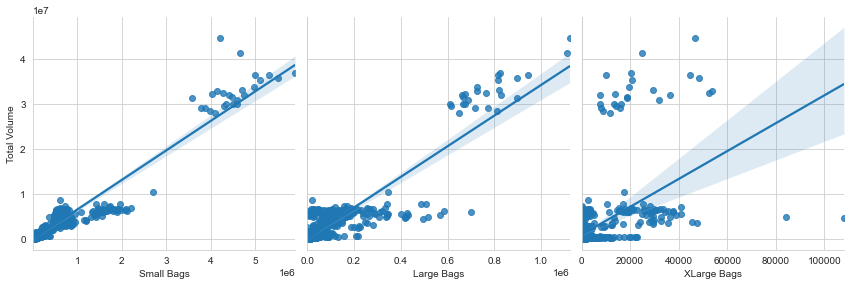

In [23]:
sns.pairplot(df_2,x_vars=['Small Bags', 'Large Bags', 'XLarge Bags'],y_vars='Total Volume',aspect=1,size=4,kind='reg',)

These three columns Small Bags, Large Bags and XLarge Bags show positive correlation with Total Volume

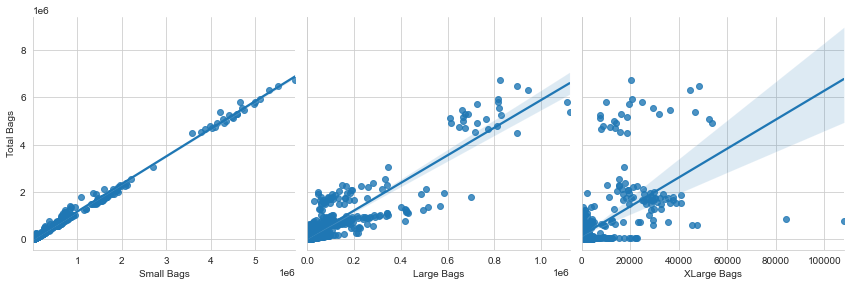

In [24]:
sns.pairplot(df_2, x_vars=['Small Bags', 'Large Bags', 'XLarge Bags'], y_vars='Total Bags', size=4, aspect=1, kind='reg')

These three columns Small Bags, Large Bags and XLarge Bags show positive correlation with Total Bags

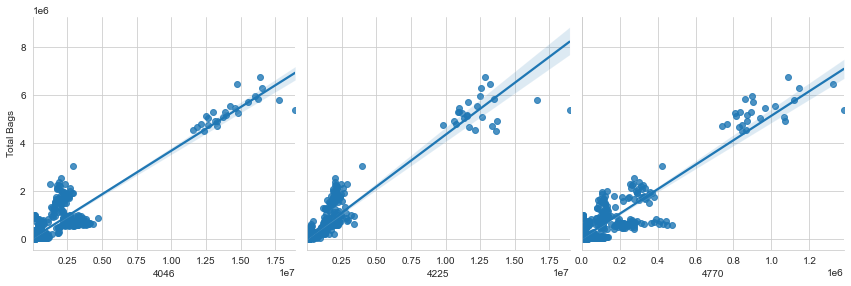

In [25]:
sns.pairplot(df_2, x_vars=['4046', '4225', '4770'], y_vars='Total Bags', size=4, aspect=1, kind='reg')

Plotting the above graphs, in order to know that how the variables are corelating with "Total Volumes" and "Total Bags" field, where we see that :

Strong Positive correlation:

'4046', '4225', '4770'.

'Small Bags', 'Large Bags', 'XLarge Bags

# Data Distribution

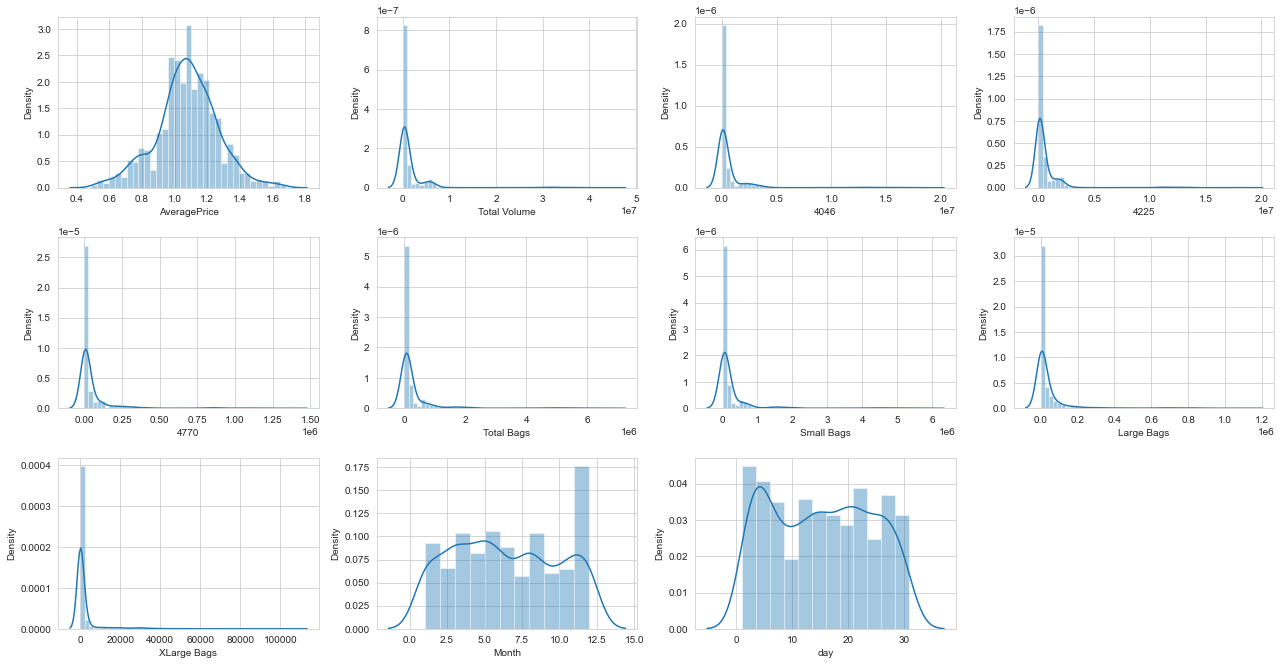

In [26]:
di=df_2.select_dtypes(exclude='object')
plt.figure(figsize=(18,12))
plot=1
for col in di:
    if plot<=15:
        plt.subplot(4,4,plot)
        sns.distplot(df_2[col])
        plt.xlabel(col)
        plot=plot+1
plt.tight_layout()

#### Observation:-
1-We can see that Our target attribute Average Price is Normally Distributed.

2- Total Volume,4046,4225,4770 Total bags,small bags,Large Bags and Xlarge Bags are Right Skewed.

3-All the right skewed distributed data has majority the values near to zero.

# Outliers Detection

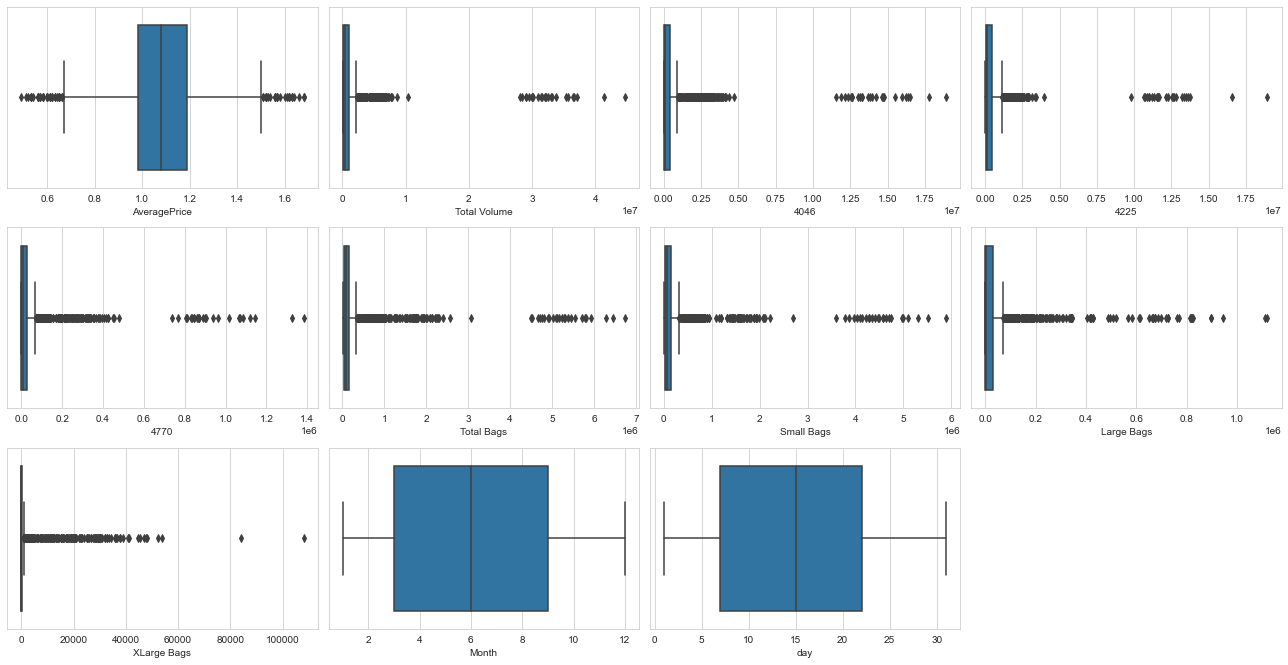

In [27]:
plt.figure(figsize=(18,12))
plot=1
for col in di:
    if plot<=12:
        plt.subplot(4,4,plot)
        sns.boxplot(df_2[col])
        plt.xlabel(col)
        plot=plot+1
plt.tight_layout()

From this Boxplots we can see that there are a huge numbers of outliers present in our Dataset.

We can remove the outliers using IQR or Zscore method.

# Removing Outliers by IQR Method

We can see in above distribution that most of our datapoints are right skewed. So to remove the outliers of skewed data we perfer IQR methods.

In [28]:
def replace_outlier(df,col):
    IQR=df[col].quantile(.75)-df[col].quantile(.25)
    lower_limit=df[col].quantile(.25)-(1.5*IQR)
    upper_limit=df[col].quantile(.75)+(1.5*IQR)
    df.loc[df[col]>upper_limit,col]=upper_limit
    sns.boxplot(df[col])

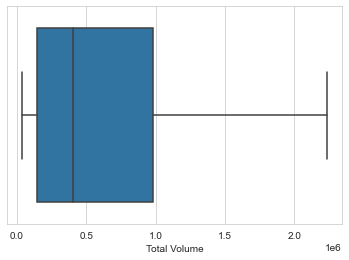

In [29]:
replace_outlier(df_2,'Total Volume')

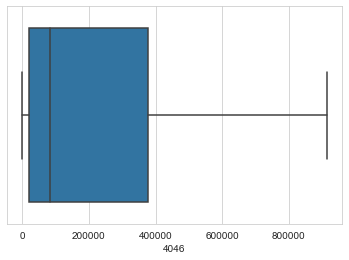

In [30]:
replace_outlier(df_2,'4046')

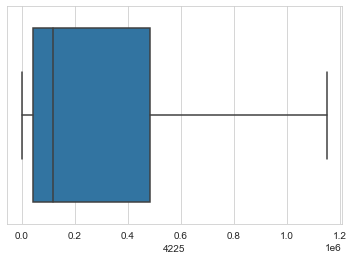

In [31]:
replace_outlier(df_2,'4225')

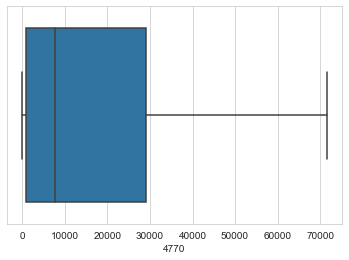

In [32]:
replace_outlier(df_2,'4770')

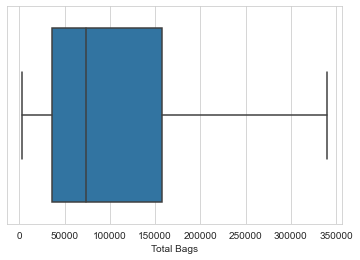

In [33]:
replace_outlier(df_2,'Total Bags')

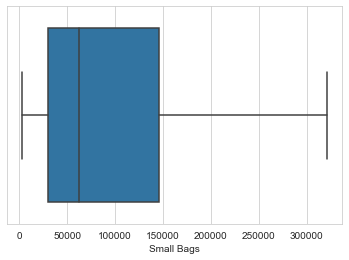

In [34]:
replace_outlier(df_2,'Small Bags')

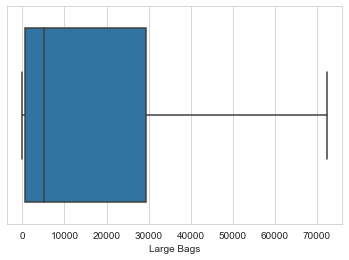

In [35]:
replace_outlier(df_2,'Large Bags')

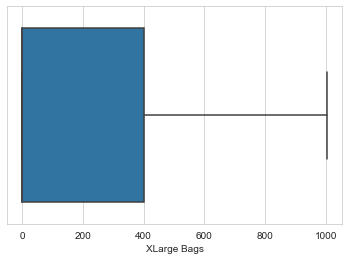

In [36]:
replace_outlier(df_2,'XLarge Bags')

In [37]:
df_2.shape

(1517, 14)

# Box Plot after Outliers Removal

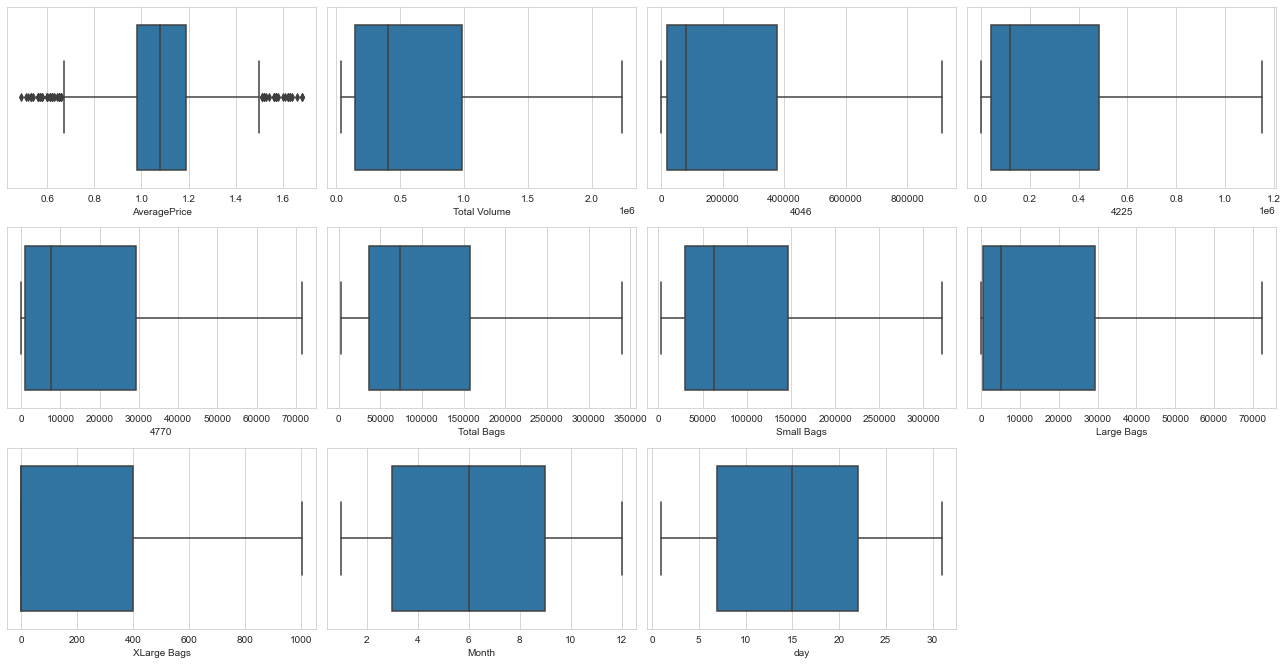

In [38]:
plt.figure(figsize=(18,12))
plot=1
for col in di:
    if plot<=12:
        plt.subplot(4,4,plot)
        sns.boxplot(df_2[col])
        plt.xlabel(col)
        plot=plot+1
plt.tight_layout()

We have removed outliers using IQR method

# Skewness

In [39]:
df_2.select_dtypes(exclude = 'object').skew()

AveragePrice   -0.109444
Total Volume    1.176935
4046            1.212500
4225            1.220883
4770            1.170573
Total Bags      1.104160
Small Bags      1.166098
Large Bags      1.230728
XLarge Bags     1.178417
Month           0.101439
day             0.041303
dtype: float64

In [40]:
df_3 = df_2.copy()

In [41]:
## Removing skewness using log1p transformation
for i in di:
    if df_3[i].skew()>0.50:
        df_3[i]=np.log1p(df_3[i])

In [42]:
df_3.select_dtypes(exclude = 'object').skew()

AveragePrice   -0.109444
Total Volume    0.001866
4046           -0.549613
4225           -0.202132
4770           -0.686219
Total Bags     -0.244284
Small Bags     -0.100335
Large Bags     -1.115955
XLarge Bags     0.528704
Month           0.101439
day             0.041303
dtype: float64

Here we can see that there is still skewness present in 4046, 4770, Large Bags and XLarge Bags, hence we will try some other method.

In [43]:
df_4 = df_2.copy()

In [44]:
## Removing skewness using sqrt transformation
for i in di:
    if df_4[i].skew()>0.50:
        df_4[i]=np.sqrt(df_4[i])

In [45]:
df_4.select_dtypes(exclude = 'object').skew()

AveragePrice   -0.109444
Total Volume    0.687491
4046            0.700681
4225            0.738938
4770            0.609977
Total Bags      0.622877
Small Bags      0.704719
Large Bags      0.688648
XLarge Bags     0.956136
Month           0.101439
day             0.041303
dtype: float64

Here we can see that there is skewness present in about all features. Thus we will apply some other method.

In [46]:
df_5 = df_2.copy()

In [47]:
## Removing skewness using log transformation
for i in di:
    if df_5[i].skew()>0.50:
        df_5[i]=np.log(df_5[i])

In [48]:
df_5.select_dtypes(exclude = 'object').skew()

AveragePrice   -0.109444
Total Volume    0.001860
4046           -0.549841
4225           -0.202211
4770                 NaN
Total Bags     -0.244339
Small Bags     -0.100385
Large Bags           NaN
XLarge Bags          NaN
Month           0.101439
day             0.041303
dtype: float64

Here we get NaN values in 4770, Large Bags and XLarge Bags columns hence we will not use log method in these columns.

In [49]:
df_6 = df_2.copy()

In [50]:
## Removing skewness using cbrt transformation
for i in di:
    if df_6[i].skew()>0.50:
        df_6[i]=np.cbrt(df_6[i])

In [51]:
df_6.select_dtypes(exclude = 'object').skew()

AveragePrice   -0.109444
Total Volume    0.476675
4046            0.381440
4225            0.502072
4770            0.273031
Total Bags      0.383600
Small Bags      0.477526
Large Bags      0.305380
XLarge Bags     0.769899
Month           0.101439
day             0.041303
dtype: float64

In [52]:
df_7 = df_2.copy()

In [53]:
# Removing skewness using Power Transformer
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
for i in di:
    if df_7[i].skew()>0.50:
        df_7[i]= pt.fit_transform(df_7[i].values.reshape(-1,1))

In [54]:
df_7.select_dtypes(exclude = 'object').skew()

AveragePrice   -0.109444
Total Volume    0.000426
4046           -0.109966
4225           -0.030125
4770           -0.157796
Total Bags     -0.026129
Small Bags     -0.013660
Large Bags     -0.215798
XLarge Bags     0.356090
Month           0.101439
day             0.041303
dtype: float64

Hence by applying power transformation all the skewness of our column has been removed.

In [55]:
df_7.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,day
0,1.33,-1.549120,-1.688397,-0.602666,-1.631126,-1.898684,-1.763864,-1.153048,-0.895726,conventional,Albany,2015,12,27
1,1.35,-1.684799,-1.802144,-0.725090,-1.590472,-1.829955,-1.688685,-1.144003,-0.895726,conventional,Albany,2015,12,20
2,0.93,-1.023778,-1.759534,-0.161742,-1.403462,-1.948922,-1.820419,-1.132437,-0.895726,conventional,Albany,2015,12,13
3,1.08,-1.371001,-1.664266,-0.428159,-1.542330,-2.202471,-2.109540,-1.077516,-0.895726,conventional,Albany,2015,6,12
4,1.28,-1.747262,-1.714503,-0.736156,-1.532602,-2.156451,-2.065847,-0.990011,-0.895726,conventional,Albany,2015,11,29


# Encoding of Categorical Attribute

In [56]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
df_7['region'] = oe.fit_transform(df_7['region'].values.reshape(-1,1))
df_7['Year'] = oe.fit_transform(df_7['Year'].values.reshape(-1,1))

In [57]:
df_7.sample(5)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,day
1295,0.90,0.307436,0.757056,-0.178813,-0.750883,0.441531,-0.056837,1.304589,-0.895726,conventional,1.0,1.0,2,28
1147,1.33,-1.933005,-1.431508,-1.178072,-1.831119,-1.330476,-1.147675,-1.796872,-0.895726,conventional,46.0,0.0,4,1
232,1.24,0.626257,-0.440612,0.926773,1.404552,0.345330,0.478576,-0.391873,1.368300,conventional,8.0,0.0,6,21
532,1.20,-1.093299,-0.074662,-1.691640,-0.848457,-1.032139,-1.154139,0.197207,-0.895726,conventional,19.0,0.0,3,29
531,1.10,-0.837697,0.106578,-1.543795,-0.853769,-0.905641,-1.199495,0.422952,-0.895726,conventional,19.0,0.0,5,4


In [58]:
df_7['type'].unique()
## There is only one unique Value in Type columns which is conventional, we can drop. 

array(['conventional'], dtype=object)

# Splitting Data

In [59]:
X = df_7.drop(['AveragePrice','type'],axis=1)
y = df_7[['AveragePrice']]

In [60]:
X

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region,Year,Month,day
0,-1.549120,-1.688397,-0.602666,-1.631126,-1.898684,-1.763864,-1.153048,-0.895726,0.0,0.0,12,27
1,-1.684799,-1.802144,-0.725090,-1.590472,-1.829955,-1.688685,-1.144003,-0.895726,0.0,0.0,12,20
2,-1.023778,-1.759534,-0.161742,-1.403462,-1.948922,-1.820419,-1.132437,-0.895726,0.0,0.0,12,13
3,-1.371001,-1.664266,-0.428159,-1.542330,-2.202471,-2.109540,-1.077516,-0.895726,0.0,0.0,6,12
4,-1.747262,-1.714503,-0.736156,-1.532602,-2.156451,-2.065847,-0.990011,-0.895726,0.0,0.0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,-0.611523,-0.203219,-0.581252,0.500056,-0.261770,-0.248294,0.334127,1.113088,7.0,1.0,10,16
1513,-0.670356,-0.338604,-0.628968,0.558876,-0.202086,-0.144822,0.249385,-0.895726,7.0,1.0,9,10
1514,-0.669511,-0.306738,-0.620684,0.473701,-0.215396,-0.167970,0.231452,1.337311,7.0,1.0,2,10
1515,-0.619289,-0.232939,-0.612544,0.498873,-0.192696,-0.129122,0.232534,-0.895726,7.0,1.0,9,25


In [61]:
y

,AveragePrice
0,1.33
1,1.35
2,0.93
3,1.08
4,1.28
...,...
1512,1.39
1513,1.51
1514,1.48
1515,1.47


# Scaling

As the Year column has only two classes 0 and 1 we will not scale them. We will scale rest of the columns.

In [62]:
columns = X.columns

In [ ]:
columns = columns.drop('Year')

In [75]:
columns

Index(['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'region', 'Month', 'day'],
      dtype='object')

In [70]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
for i in columns:
    X[i] = ss.fit_transform(X[i].values.reshape(-1,1))

In [73]:
X

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region,Year,Month,day
0,-1.549120,-1.688397,-0.602666,-1.631126,-1.898684,-1.763864,-1.153048,-0.895726,-1.314338,0.0,1.624154,1.310530
1,-1.684799,-1.802144,-0.725090,-1.590472,-1.829955,-1.688685,-1.144003,-0.895726,-1.314338,0.0,1.624154,0.529537
2,-1.023778,-1.759534,-0.161742,-1.403462,-1.948922,-1.820419,-1.132437,-0.895726,-1.314338,0.0,1.624154,-0.251456
3,-1.371001,-1.664266,-0.428159,-1.542330,-2.202471,-2.109540,-1.077516,-0.895726,-1.314338,0.0,-0.104453,-0.363027
4,-1.747262,-1.714503,-0.736156,-1.532602,-2.156451,-2.065847,-0.990011,-0.895726,-1.314338,0.0,1.336053,1.533671
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,-0.611523,-0.203219,-0.581252,0.500056,-0.261770,-0.248294,0.334127,1.113088,-0.880286,1.0,1.047952,0.083255
1513,-0.670356,-0.338604,-0.628968,0.558876,-0.202086,-0.144822,0.249385,-0.895726,-0.880286,1.0,0.759850,-0.586168
1514,-0.669511,-0.306738,-0.620684,0.473701,-0.215396,-0.167970,0.231452,1.337311,-0.880286,1.0,-1.256858,-0.586168
1515,-0.619289,-0.232939,-0.612544,0.498873,-0.192696,-0.129122,0.232534,-0.895726,-0.880286,1.0,0.759850,1.087389


# Feature Importance

In [76]:
from sklearn.ensemble import ExtraTreesRegressor
extra=ExtraTreesRegressor()
extra.fit(X,y)

ExtraTreesRegressor()

In [77]:
print(extra.feature_importances_)

[0.09351165 0.32371564 0.07919732 0.06836165 0.06344158 0.0854946
 0.04858284 0.04759059 0.0748846  0.04999753 0.03514201 0.03007997]


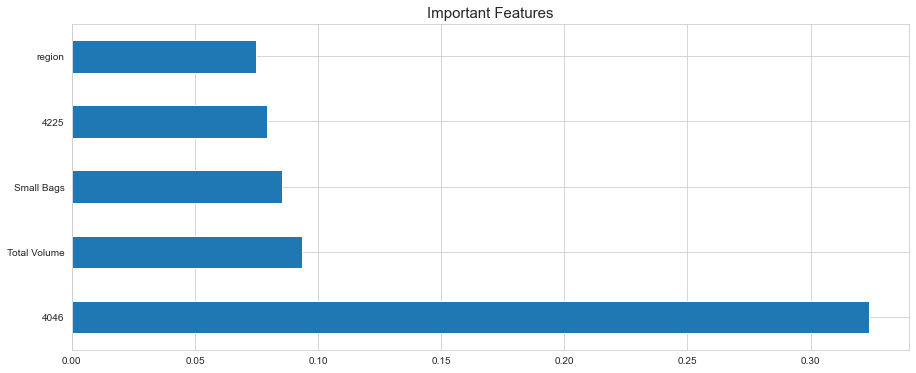

In [79]:
plt.figure(figsize=(15,6))
plt.title('Important Features',fontsize=15)
feat_importance=pd.Series(extra.feature_importances_,index=X.columns)
feat_importance.nlargest().plot(kind='barh')
plt.show()

Here we can see that Avocado Hass number 4046 is our most important features among all the features.

# Model Building

In [106]:
## Importing machine learning Library
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score
from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split
from xgboost import XGBRegressor

In [97]:
def maxr2_score(clf,x,y):
    maxr2_score1=0
    for i in range(100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        r2_cscore=r2_score(y_test,pred)
        if r2_cscore>maxr2_score1:
            maxr2_score1=r2_cscore
            final_r=i
    print('max r2 score corresponding to',final_r,'is',maxr2_score1)
    print('\n')
    print('cross validation score',cross_val_score(clf,x,y,scoring='r2').mean())
    print('\n')
    print('Difference =', maxr2_score1 - cross_val_score(clf,x,y,scoring='r2').mean())
    print('Standard Deviation',cross_val_score(clf,x,y,scoring='r2').std())
    print('\n')
    print('Training accuracy',clf.score(x_train,y_train))
    print('\n')
    print('Test Accuracy',clf.score(x_test,y_test))
    print('\n')
    print('MAE',mean_absolute_error(y_test,pred))
    print('\n')
    print('MSE',mean_squared_error(y_test,pred))
    print('\n')
    print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))
    print('\n')
    sns.regplot(pred,y_test)
    return final_r

max r2 score corresponding to 30 is 0.4882870110511124


cross validation score 0.12865024882263765


Difference = 0.35963676222847474
Standard Deviation 0.12678153165011607


Training accuracy 0.3879314570162634


Test Accuracy 0.4241618899086822


MAE 0.10974279524057748


MSE 0.019151152658289258


RMSE 0.1383876896919999




30

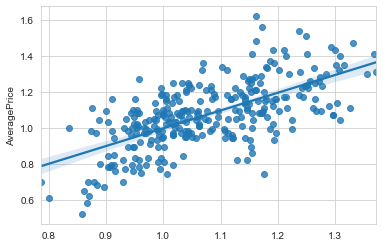

In [98]:
#Linear Regression
LR = LinearRegression()
maxr2_score(LR, X, y)

max r2 score corresponding to 30 is 0.4867180802290162


cross validation score 0.12844456026108214


Difference = 0.35827351996793405
Standard Deviation 0.1260052733253864


Training accuracy 0.3877976445534326


Test Accuracy 0.425890128961561


MAE 0.10961094259028199


MSE 0.019093675097579615


RMSE 0.13817986502229482




30

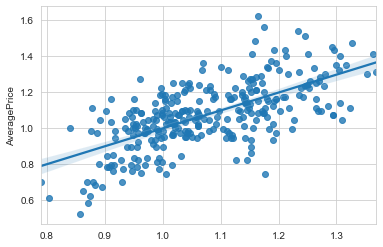

In [99]:
ridge = Ridge()
maxr2_score(ridge, X, y)

max r2 score corresponding to 15 is 0.7429949156185987


cross validation score -0.30055115004171595


Difference = 1.1998421155978185
Standard Deviation 0.7365458120296469


Training accuracy 1.0


Test Accuracy 0.66971614901665


MAE 0.07200657894736842


MSE 0.010984539473684213


RMSE 0.10480715373334118




15

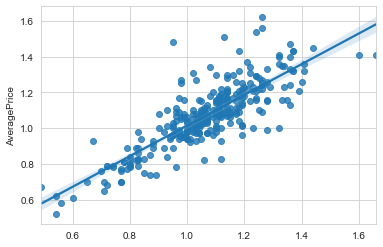

In [100]:
#### Decision Tree
DT=DecisionTreeRegressor()
maxr2_score(DT,X,y)

max r2 score corresponding to 1 is 0.7476090404340805


cross validation score 0.05033682639629002


Difference = 0.6972722140377905
Standard Deviation 0.3196682830431782


Training accuracy 0.7926579678514643


Test Accuracy 0.7086254125061953


MAE 0.07464473684210525


MSE 0.0096905


RMSE 0.09844033726069816




1

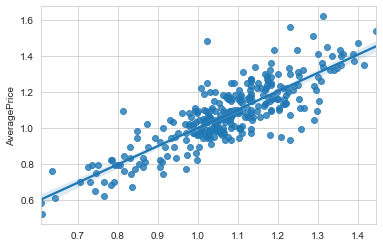

In [101]:
## KNN
KNN = KNeighborsRegressor()
maxr2_score(KNN,X,y)

max r2 score corresponding to 1 is 0.7934424689436701


cross validation score 0.15855630368097848


Difference = 0.6348861652626916
Standard Deviation 0.31914166284572315


Training accuracy 0.7944909910554421


Test Accuracy 0.7180362866692263


MAE 0.07672137357515008


MSE 0.009377514310818059


RMSE 0.09683756662999159




1

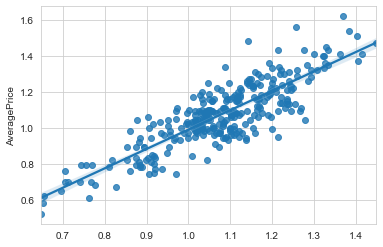

In [102]:
##SVm
SVM = SVR()
maxr2_score(SVM , X, y)

max r2 score corresponding to 1 is 0.852810389980146


cross validation score 0.1936536607024992


Difference = 0.5986621674676678
Standard Deviation 0.270370255328558


Training accuracy 0.971204740238861


Test Accuracy 0.8098719651827837


MAE 0.058394736842105284


MSE 0.006323254671052628


RMSE 0.07951889505678904




1

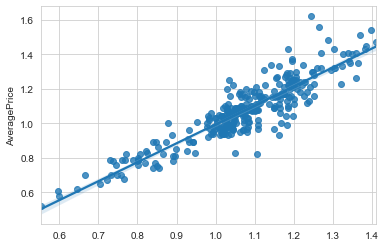

In [103]:
## random Forest
RF =RandomForestRegressor()
maxr2_score(RF , X, y)

max r2 score corresponding to 74 is 0.6712875922455086


cross validation score 0.28584674519413145


Difference = 0.34225505526219585
Standard Deviation 0.07183214223058083


Training accuracy 0.6491499338099679


Test Accuracy 0.6276424864114636


MAE 0.09199682652450997


MSE 0.012383820141852391


RMSE 0.11128261383456263




74

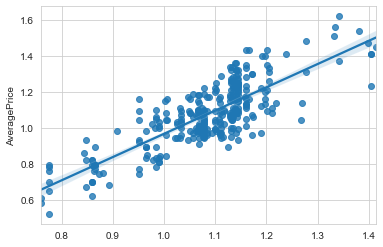

In [111]:
## AdaBoost
Adb=AdaBoostRegressor()
maxr2_score(Adb,X,y)

max r2 score corresponding to 1 is 0.7837344172491316


cross validation score 0.2598564535995296


Difference = 0.5251957413767538
Standard Deviation 0.30142371443384497


Training accuracy 0.8331600790796868


Test Accuracy 0.752335441343307


MAE 0.06996290292257881


MSE 0.008236797266040617


RMSE 0.09075680286370062




1

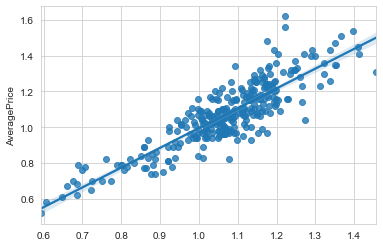

In [105]:
## Gradient Boost
gnb=GradientBoostingRegressor()
maxr2_score(gnb,X,y)

max r2 score corresponding to 1 is 0.8708253959280754


cross validation score 0.0623570550353197


Difference = 0.8084683408927557
Standard Deviation 0.36234495305674713


Training accuracy 0.9982678309082901


Test Accuracy 0.8085055394853624


MAE 0.05697353613219763


MSE 0.006368699087927669


RMSE 0.07980412951675915




1

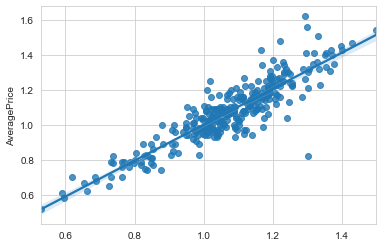

In [107]:
#XGBoost Regressor
XGB = XGBRegressor()
maxr2_score(XGB, X, y)

From all the models above we can see that the AdaBoost Regressor has performed best, with the least difference between the r2_score and cross validation score and also the least difference between the Training and Test scores. Also there is less error in this model compared to other models hence we will choose the Adaboost Regressor as our best model.

# Hyperparameter Tuning.

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=74)
param = {'n_estimators': [50,100],
         'learning_rate': [0.01,0.05,0.1,0.3,1],
         'loss':['linear', 'square', 'exponential']}
glf = GridSearchCV(Adb, param, scoring='r2', n_jobs=-1)
glf.fit(X_train, y_train)
print('Best score is {} for best parameters {}'.format(glf.best_score_, glf.best_params_))

Best score is 0.5996199205468494 for best parameters {'learning_rate': 1, 'loss': 'linear', 'n_estimators': 50}


Hence here we can see that through the Hyperparameter Tuning the r2_score further dropped. It is seen sometimes the Hyperparameter Tuning doesn't work hence we will keep the default parameters for the further metrics.

max r2 score corresponding to 55 is 0.6737907552055228


cross validation score 0.32807909932650076


Difference = 0.3787280717234802
Standard Deviation 0.05816281369862135


Training accuracy 0.6529920681643986


Test Accuracy 0.6370345283874895


MAE 0.0903923799738882


MSE 0.012071460771217112


RMSE 0.10987019965039252




55

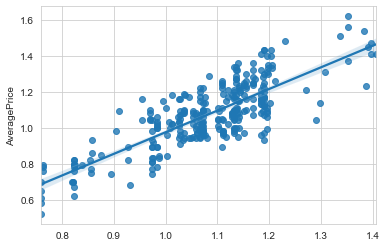

In [117]:
Adb = AdaBoostRegressor()
maxr2_score(Adb, X, y)

# Model Saving

In [118]:
import joblib
joblib.dump(Adb, 'Avocado_Adb.pkl')

['Avocado_Adb.pkl']

In [119]:
model = joblib.load('Avocado_Adb.pkl')
prediction = model.predict(X_test)
prediction

array([1.14777778, 1.18863636, 0.98240506, 0.82323944, 1.05868984,
       1.13104348, 0.9832    , 1.05189591, 1.08016   , 1.02439815,
       1.16777344, 0.82900862, 1.07045802, 1.12839416, 1.07252874,
       1.0712    , 1.13104348, 0.82472637, 1.14092105, 0.82900862,
       0.75891473, 0.97269939, 1.11580645, 1.07045802, 0.90414634,
       1.12      , 1.13104348, 1.15166302, 1.19631491, 0.95340058,
       1.13104348, 1.19016529, 1.07045802, 1.19631491, 0.97617886,
       1.20911111, 0.9832    , 1.13151235, 1.10182927, 0.97269939,
       0.97617886, 1.15166302, 1.13534483, 1.19825333, 1.01220339,
       1.06061538, 0.9999031 , 1.14092105, 1.03578358, 1.19016529,
       0.84411765, 0.97617886, 1.21264706, 1.05868984, 1.0912766 ,
       1.05868984, 1.05318386, 1.07260163, 1.13992537, 0.75891473,
       1.23126354, 1.0712    , 1.02439815, 1.3829538 , 0.75891473,
       1.18909465, 1.13673016, 1.19825333, 1.18909465, 0.9493    ,
       1.13533101, 0.81901316, 1.15166302, 0.97269939, 1.38140